In [1]:
import sklearn
import keras
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import keras.utils as image
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
    
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    X = np.array(image_data)
    Y = np.array(df.iloc[:,1:29])
    
    return X, Y

In [3]:
def accuracy_score(test_path, model_path):
    
    test_df = pd.read_csv(test_path, delimiter=" ")
    X_test, Y_test = arrange_data (test_df)

    model = load_model(model_path)

    pred = model.predict(np.array(X_test))

    count = 0
    for i in tqdm(range(len(pred))):
        value = 0
        
        first3_index = np.argsort(pred[i])[-3:]
        correct = np.where(Y_test[i] == 1)[0]
        
        for j in first3_index:
            if j in correct:
                value += 1
                
        if (value>0):
            count=count+1
                
    print("Images having atleast one genre correctly identified=",count)
    print("Total number of images =",len(pred))
    print("Accuracy = ", count/len(pred))

In [4]:
accuracy_score("Data/Test.csv", "Models/Model_6c.h5")

100%|███████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 255.07it/s]


7/7 [==============================] - 2s 187ms/step


100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 34341.28it/s]

Images having atleast one genre correctly identified= 186
Total number of images = 206
Accuracy =  0.9029126213592233


In [5]:
accuracy_score("Data/Test.csv", "Models/Model_4d.h5")

100%|██████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 1391.61it/s]


7/7 [==============================] - 33s 5s/step


100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 25749.56it/s]

Images having atleast one genre correctly identified= 183
Total number of images = 206
Accuracy =  0.8883495145631068


In [6]:
def find_genre(test_path, model_path, index, gen):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    column_lookups = pd.read_csv("Data/Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    print("Correct answers: ", gen[index])
    print("Predicted: \t")

    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(prob[0][top_3[i]]))
    plt.imshow(img)

In [7]:
df = pd.read_csv("Data/data_with_path.csv")
ids = df.Movie_ID.tolist()
gen = df.Genre.tolist()

1/1 [==============================] - 0s 290ms/step
Correct answers:  Comedy,Family,Romance
Predicted: 	
Family (0.566)
Crime (0.354)
Adult (0.234)


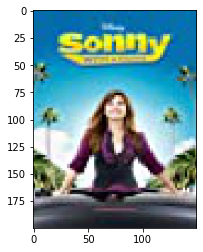

In [8]:
index = np.random.randint(low=0, high=len(ids))
path = "Posters/" + str(ids[index]) + ".jpg"
find_genre(path,"Models/Model_6c.h5", index, gen)

1/1 [==============================] - 1s 949ms/step
Correct answers:  Documentary,Biography,Drama
Predicted: 	
Family (0.738)
News (0.259)
Adult (0.248)


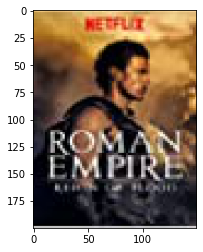

In [24]:
index = np.random.randint(low=0, high=len(ids))
path = "Posters/" + str(ids[index]) + ".jpg"
find_genre(path,"Models/Model_4d.h5", index, gen)